# Introduction

ABC Private Limited aims to enhance its customer engagement and sales strategies by gaining deeper insights into customer purchase behavior. By analyzing historical purchase data, the company seeks to build a predictive model capable of estimating the potential purchase amount of individual customers for specific product categories. This model will enable the company to tailor personalized offers and marketing campaigns, ultimately driving increased customer satisfaction and revenue.

**About Dataset**

* A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.
  
* 
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Roadmap for DATA Analysis



**1. Data Overview:**

a. Check for null values, data types, and unique values.  

b. Understand basic statistics (mean, median, min, max, etc.).

**2. Target Variable Analysis:**

a. Distribution of purchase amount. 

b. Outlier detection and treatment.

**3. Demographics Analysis:**

a. Age vs. Purchase Amount.

b. Gender vs. Purchase Amount.

c. Marital Status vs. Purchase Amount.

**4. City Analysis:**

a. City Type and Stay in Current City vs. Purchase Amount.

b. Regional differences in purchasing power or preferences.

**5. Product Analysis:**

a. Product Category vs. Purchase Amount.

b. Popular product categories among specific demographics.

**6. Correlations:**

a. Heatmap to check correlations between features (e.g., age, city type) and purchase amount.
Feature Interactions:

b. Explore combinations like Gender & Product Category, or Age & Marital Status, to uncover trends.

# DATA CLEANING 

**Data cleaning consist of:**

1. check the null Values
2. check the duplicate
3. renaming the column
4. Drop out unnecssary column
5. Cleaning the indiviual column
6. Check the data  data


In [1]:
# first we have install required library

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# now we have to load data

data = pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv")

In [3]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# now get information about datset understand what we want what is required

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# count the data type

data.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [7]:
# Show the total number of column and rows

data.shape

(550068, 12)

**CHECKIG NULL VALUES IN DATASET** 

In [8]:
#Findout Null value in each column

data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

**CHECKING DUPLICATE IN DATASET**

In [9]:
#Finding duplicate in dataset

data.duplicated().sum()

0

**RENAMEING THE COLUMN**

In [10]:
data.rename(columns={'User_ID':'UserID','Product_Category_1':'product1','Product_Category_2':'product2','Product_Category_3':'product3','Marital_Status':'maritial','Stay_In_Current_City_Years':'city'},inplace=True)
data.head(3)

,UserID,Product_ID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [11]:
# okay data type is correct so now we understand that we do not require uers_id and product_id for analysis

data.drop(['Product_ID'],inplace = True,axis = 'columns')

In [12]:
data.head()

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


**CLEANING INDIVIUALS COLUMN**

**cloumn city**

In [13]:
#city

data['city'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
#now we have problem there is "+" sign so we have remove from dataset

def cities(value):
    if '+' in value:
        value = value.replace('+','')
        return int(value)
    else:
        return int(value)

data['city'] = data['city'].apply(cities)



In [15]:
data['city'].unique()

array([2, 4, 3, 1, 0])

**cloumn UserID**

In [16]:
data['UserID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [17]:
data['UserID'].dtype

dtype('int64')

**column Age**

In [18]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
# So now we have to specify Age like child,teenage, adult and old

def ages(value):

    if '0-17' in value:
        value = value.replace('0-17','child')
        return str(value)
    elif '18-25' in value:
        value = value.replace('18-25','Tennager')
        return str(value)
    elif '26-35' in value:
        value = value.replace('26-35','Adult')
        return str(value)
    elif '36-45' in value:
        value = value.replace('36-45','Adult')
        return str(value)
    elif '46-50' in value:
        value = value.replace('46-50','Adult')
        return str(value)
    elif '51-55' in value:
        value = value.replace('51-55','Old')
        return str(value)
    else:
        value = value.replace('55+','Old')
        return str(value)

data['Age'] = data['Age'].apply(ages)

In [20]:
data['Age'].unique()

array(['child', 'Old', 'Adult', 'Tennager'], dtype=object)

In [21]:
data.head()

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,child,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,child,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,Old,16,C,4,0,8,NaN,NaN,7969


* Now we have replaced the age group according to catogries
* we convert the numeric data in string form
* the catogries are like (child,adult,teenage,Old)

* 0-17 ------------ Child
* 17-25 ----------- Teenager
* 25-50 ----------- Adult
* 51-55+ ---------- Old

**Marital column**

In [22]:
data['maritial'].unique()

# here  
# 0 ---> he/she is married
# 1 ---> he/she is single

array([0, 1])

In [23]:
#removing the percentage of null data in product2
(data['product2'].isnull().sum() / len(data)) * 100

31.56664266963357

In [24]:
#removing the mode of product 2
s=data.groupby('Age')['product2'].agg(pd.Series.mode)
s

Age
Adult       8.0
Old         8.0
Tennager    8.0
child       4.0
Name: product2, dtype: float64

In [25]:
for key in s.index:
    data.loc[(data['Age']==key) & (data['product2'].isnull()), 'product2']=s[key]

In [26]:
data['product2'].isnull().sum()

0

**Product 3**

In [27]:
data['product3'].value_counts()

product3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [28]:
#removing the percentage of null data in product3
(data['product3'].isnull().sum() / len(data)) * 100

69.67265865311198

In [29]:
#removing the mode of product 3
p=data.groupby('Age')['product3'].agg(pd.Series.mode)
p

Age
Adult       16.0
Old         16.0
Tennager    16.0
child       16.0
Name: product3, dtype: float64

In [30]:
for key in p.index:
    data.loc[(data['Age']==key) & (data['product3'].isnull()), 'product3']=p[key]

In [31]:
data['product3'].isnull().sum()

0

**After Cleaning check the data**

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       550068 non-null  float64
 9   product3       550068 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [33]:
data.isnull().sum()

UserID           0
Gender           0
Age              0
Occupation       0
City_Category    0
city             0
maritial         0
product1         0
product2         0
product3         0
Purchase         0
dtype: int64

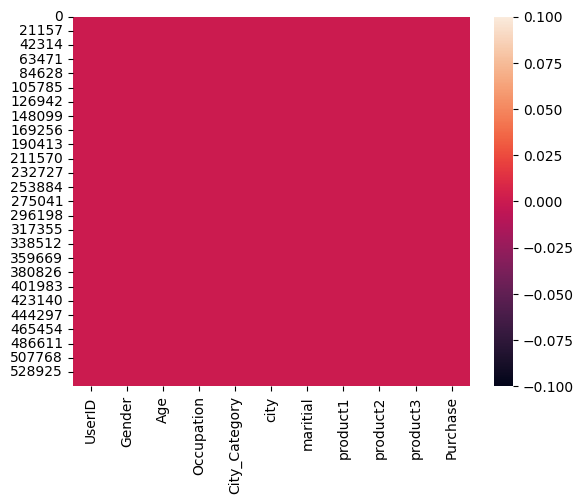

In [34]:
sns.heatmap(data.isnull())
plt.show()

* Heat map shows that there is no null value in dataset

# DATA VISULIZATON

**We have to perform various visulization to get information**

1. age vs purchased
2. visualizing individual clumn
3. understand each column insight
4. analysis which gender have most purchase
5. purchase vs product1
6. age count pie chart
7. city category pie chat
8. product vs purchase rate
9. purchase distribution of both married and unmarried
10. purchase distribution of both male and female

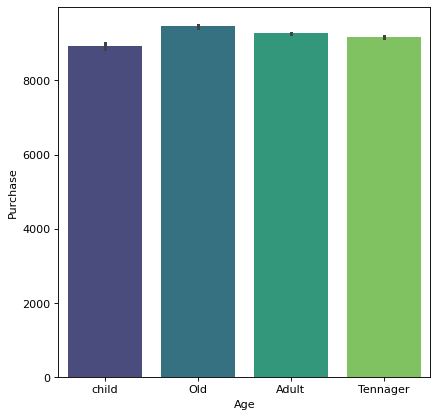

In [35]:
# age vs purchase

plt.figure(figsize=(6,6),dpi = 80)
sns.barplot(x = 'Age', y ='Purchase', data = data , palette = 'viridis' )
plt.show()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       550068 non-null  float64
 9   product3       550068 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


* From graph we have understand that Purchase power of Old is highest and Child have lowest purchase power
  

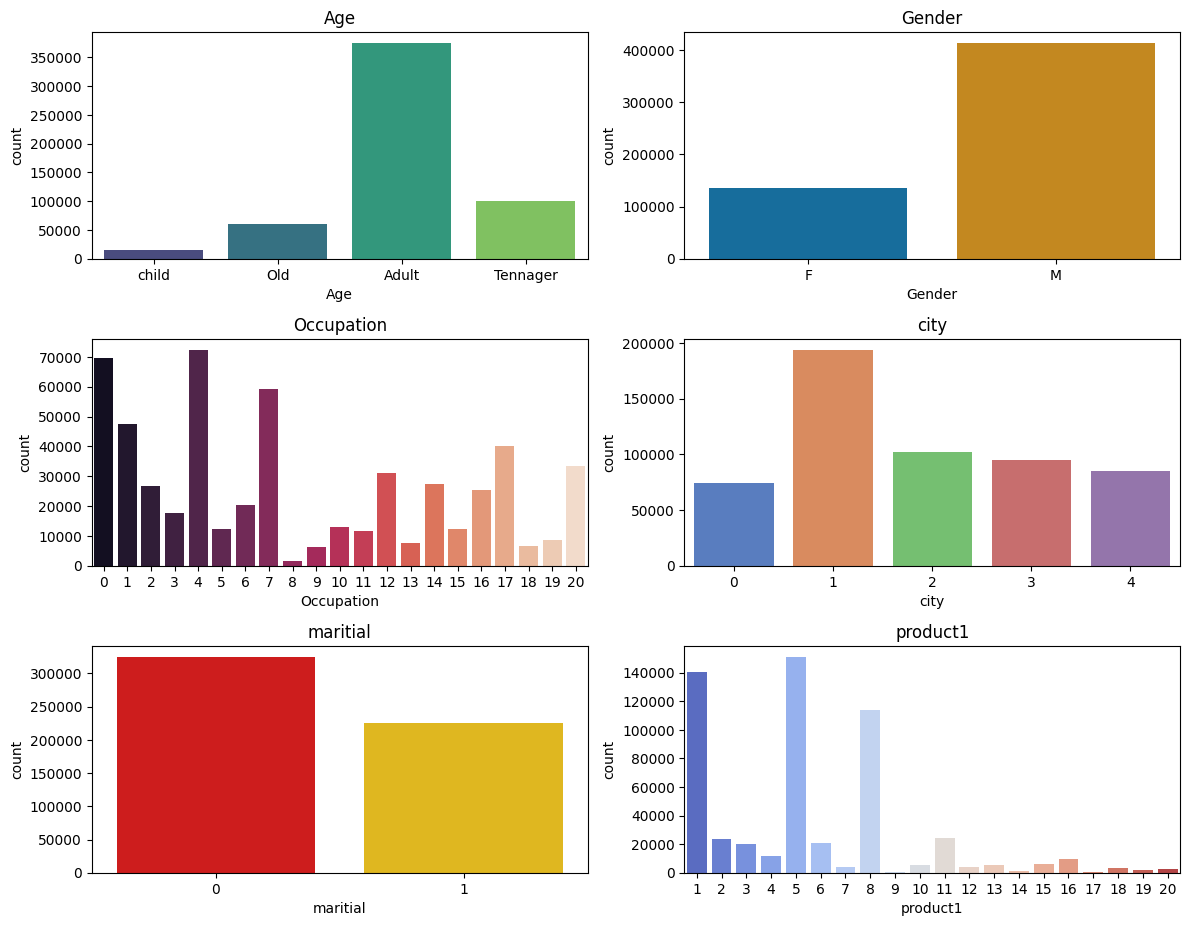

In [37]:
# now let take brod overview of all column indivually

plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.title('Age')
sns.countplot(x= 'Age', data = data , palette = 'viridis')

plt.subplot(4,2,2)
plt.title('Gender')
sns.countplot(x= 'Gender', data = data , palette = 'colorblind')

plt.subplot(4,2,3)
plt.title('Occupation')
sns.countplot(x= 'Occupation', data = data , palette = 'rocket')

plt.subplot(4,2,4)
plt.title('city')
sns.countplot(x= 'city', data = data , palette = 'muted')

plt.subplot(4,2,5)
plt.title('maritial')
sns.countplot(x= 'maritial', data = data , palette = 'hot')

plt.subplot(4,2,6)
plt.title('product1')
sns.countplot(x= 'product1', data = data , palette = 'coolwarm')

plt.tight_layout()
plt.show()

**AGE**

* As per graph adult visit the market most of time
* Adult range between 26-55+
* Child have least visiting

**GENDER**

* As per graph male count is more than female 

**MARITIAL**

* As we can see single person visit less than married person
* what can single do brother what the fuck he can do ??
* now we have count
* maried = 330,000
* single = 220,000 (lost from the life )

This is Comparsion of how visting store but now we have to go for 

* gender vs purchase
* marital vs purchase
* city vs purchase

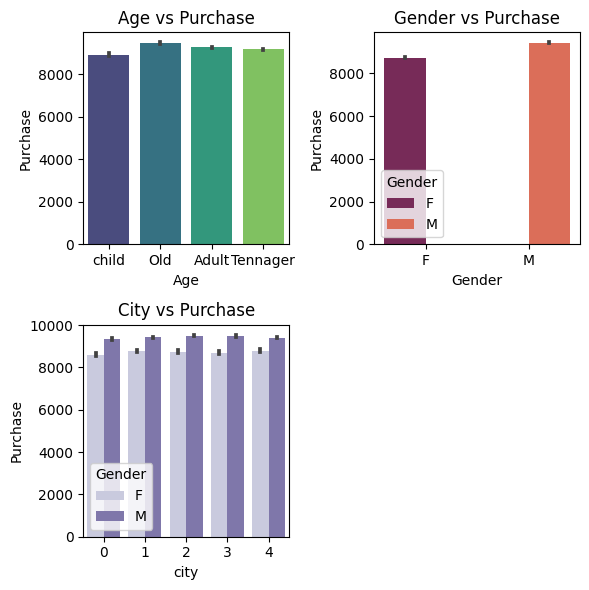

In [38]:
plt.figure(figsize = (6,6))

plt.subplot(2,2,1)
sns.barplot(x = 'Age',y ='Purchase',data = data, palette = 'viridis')
plt.title("Age vs Purchase")

plt.subplot(2,2,2)
sns.barplot(x = 'Gender',y ='Purchase',data = data,hue = 'Gender', palette = 'rocket')
plt.title("Gender vs Purchase")

plt.subplot(2,2,3)
sns.barplot(x = 'city',y ='Purchase',data = data,hue = 'Gender', palette = 'Purples')
plt.title("City vs Purchase")

plt.tight_layout()
plt.show() 

**So now we can conclude by analysing three graph that male have more purchase than female**

<Axes: title={'center': 'maritial status vs purchase'}, xlabel='maritial', ylabel='Purchase'>

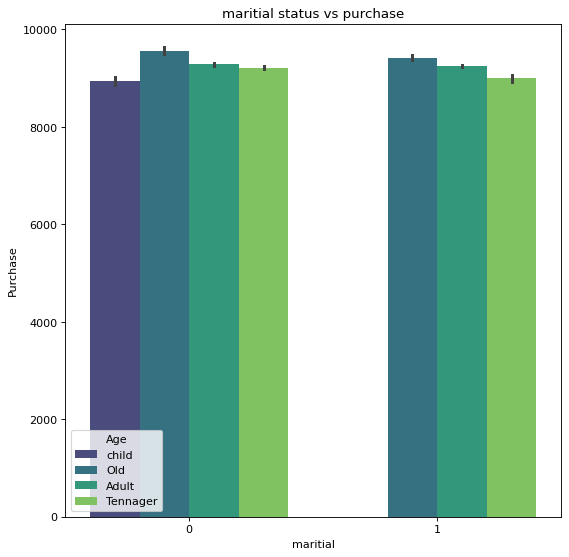

In [39]:
# Plotting purchase vs product1
plt.figure(figsize=(8,8),dpi=80)
plt.title('maritial status vs purchase')
sns.barplot(x='maritial',y='Purchase',data=data,palette='viridis',hue='Age')

* This graph we come to know that purchase rate is more in singles rather than in married.
* 
In singles purchase rate of old age is higher where as in married purchase rate of old is higher.

,Age
Age,
Adult,375301
Old,60005
Tennager,99660
child,15102


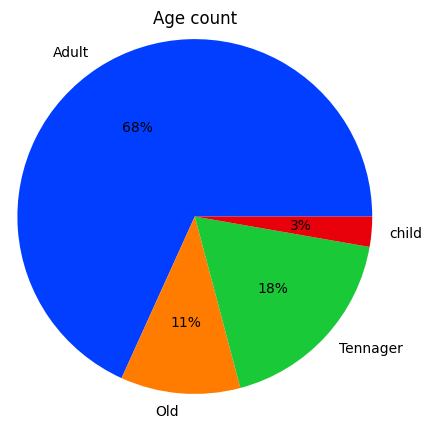

In [40]:
#Age count
a=data.groupby('Age')['Age'].agg('count')
display(a.to_frame())
plt.title('Age count')
palette_color=sns.color_palette('bright')
plt.pie(a, colors=palette_color,labels=a.index,radius=1.2,autopct='%.0f%%')
plt.show()

* Maximum people visiting the store are from adult category.
* 
Least people visiting belong to child category.

,City_Category
City_Category,
A,147720
B,231173
C,171175


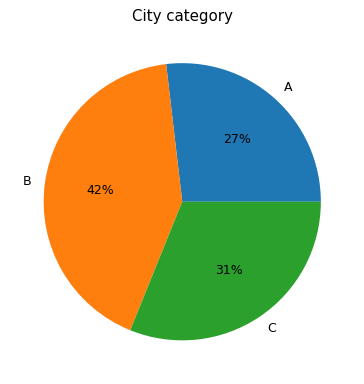

In [41]:
#city category
plt.figure(figsize=(5,5),dpi=90)
plt.title('City category')
palette_color=sns.color_palette('bright')
b=data.groupby('City_Category')['City_Category'].agg('count')
display(b.to_frame())
plt.pie(b,labels=b.index,autopct='%.0f%%')
plt.show()

* People visting the store belong to city category B.
* 
Least visiting belong to city A.

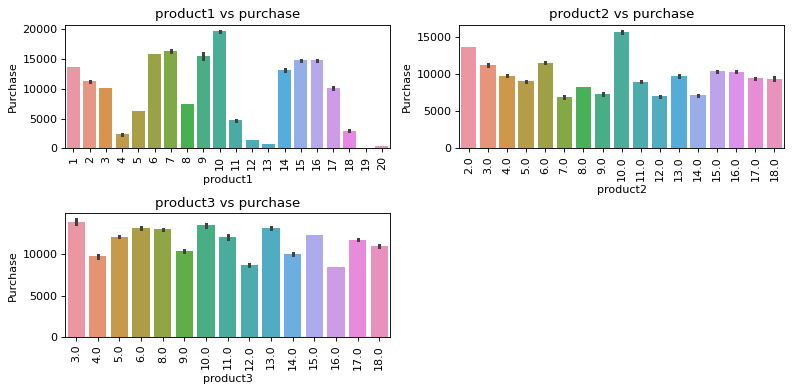

In [42]:
#Plotting products vs purchase rate
plt.figure(figsize=(10,5),dpi=80)
plt.subplot(2,2,1)
plt.title('product1 vs purchase')
sns.barplot(x='product1',y='Purchase',data=data)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('product2 vs purchase')
sns.barplot(x='product2',y='Purchase',data=data)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('product3 vs purchase')
sns.barplot(x='product3',y='Purchase',data=data)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

* In this graph of product1 and product2 the 10th product is more purchased.
* 
In product3 3rd product is more purchased compared to all.

/tmp/ipykernel_30/114898112.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unmarried, shade=True, color='blue', label='Unmarried')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/114898112.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(married, shade=True, color='green', label='Married')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

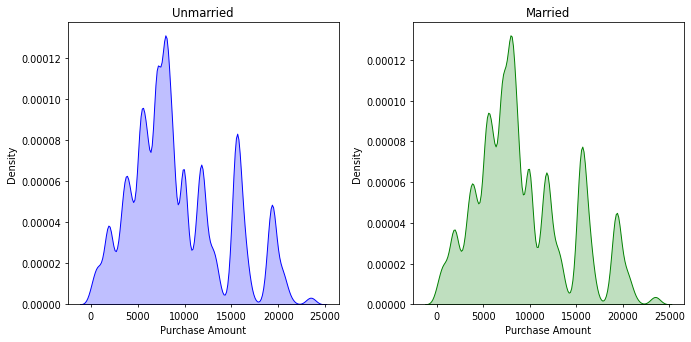

In [43]:
plt.figure(figsize=(10, 5), dpi=70)

# Subplot for Unmarried
plt.subplot(1, 2, 1)
unmarried = data[data['maritial'] == 0]['Purchase']
plt.title('Unmarried')
sns.kdeplot(unmarried, shade=True, color='blue', label='Unmarried')
plt.xlabel('Purchase Amount')

# Subplot for Married
plt.subplot(1, 2, 2)
married = data[data['maritial'] == 1]['Purchase']
plt.title('Married')
sns.kdeplot(married, shade=True, color='green', label='Married')
plt.xlabel('Purchase Amount')

plt.tight_layout()
plt.show()

Purchase distribution of both 'Married' and 'UnMarried' customers are quitely same

# CONCLUSION


* Marital Status: Married customers spend more than unmarried ones.
* Age: Adult groups (26–55) shop more frequently, while older groups make higher-value purchases.
* Demographics: Longer city residency links to higher loyalty and spending.
* Gender: Male customers make higher-value purchases.
* Product Trends: Certain categories are popular by age; personalized offers can boost engagement.